In [3]:
import numpy as np
import scipy

Создать произвольную верхнетреугольную матрицу А 4 порядка (не унитреугольную), вектор B произвольный. Решить систему AX = B.


In [4]:
A = np.triu(np.random.randint(1, 10, size=(4, 4)))
B = np.random.randint(1, 10, size=(4,))
A_inv = np.linalg.inv(A)
# X=A^(-1)B
A,B,np.dot(A_inv, B),np.linalg.solve(A, B)

(array([[9, 7, 3, 2],
        [0, 9, 5, 3],
        [0, 0, 4, 4],
        [0, 0, 0, 5]]),
 array([4, 6, 2, 5]),
 array([-0.08641975,  0.61111111, -0.5       ,  1.        ]),
 array([-0.08641975,  0.61111111, -0.5       ,  1.        ]))

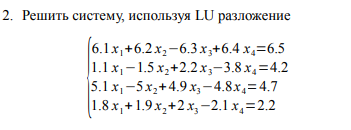

In [5]:
A = np.array([[6.1, 6.2, -6.3, 6.4],
              [1.1, -1.5, 2.2, -3.8],
              [5.1, -5, 4.9, -4.8],
              [1.8, 1.9, 2,-2.1]])
B = np.array([6.5, 4.2, 4.7, 2.2])

# LU-разложение матрицы A
P, L, U = scipy.linalg.lu(A)
y = scipy.linalg.solve_triangular(L, B, lower=True, check_finite=False)

# Решим систему уравнений Ux = y
x = scipy.linalg.solve_triangular(U, y, check_finite=False)
print("Проверка: ", np.dot(np.dot(A,x), P))
print("Решение X:")
print(x)

Проверка:  [6.5 4.2 4.7 2.2]
Решение X:
[ 0.96420815  0.80787026  0.16594716 -0.52265596]


Решить систему из пункта 2 с помощью QR разложения
матрицы А. QR разложение найти методом Хаусхолдера. Проверить полученное решение непосредственной подстановкой в исходную систему, а также методом np.solve.


In [11]:
# Выполним QR-разложение матрицы A 
Q, R = np.linalg.qr(A)

# Решим систему уравнений y = Q^(T * B)
y = np.dot(Q.T, B)
x = np.linalg.solve(R, y)


x,np.linalg.solve(A, B)

(array([ 2.60277594, -0.47095758, -0.81250729]),
 array([ 2.60277594, -0.47095758, -0.81250729]))

Решить систему методом простых итераций с точностью до
10−3
. Проверить выполнение достаточного условия сходимости.
Если условие не выполняется, в программе выполнить эквивалентные преобразования системы, после этого привести к удобному
для итераций виду. Оформить итерации в виде таблицы

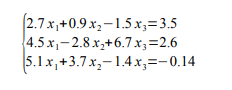

In [10]:
A = np.array([[2.7, 0.9, -1.5],
              [4.5, -2.8, 6.7],
              [5.1, 3.7, -1.4]])
B = np.array([3.5, 2.6,  -0.14])

epsilon = 1e-3

def preporetion(A, B):
    new_A = np.zeros_like(A)
    for i in range(0,len(A)):
        for j in range(0,len(A)):
            if (i==j): 
                new_A[i][j] = 0
            else:
                new_A[i][j] = A[i][j]/(-A[i][i])

    new_B = np.zeros_like(B)
    for i in range(0,len(B)):
        new_B[i] = B[i]/(A[i][i])
    return new_A, new_B

new_A, new_B = preporetion(A, B)
x = np.array([0,0,0])

iterations = 0
while True:
    if(np.linalg.norm(new_A.T, 1)>1):
        print("Не выполнено достаточное условие")
        A = np.array([[4.3, -0.54, 0.5],
                          [1.6, 2.3, -1.5],
                          [0.5, 0.34, 1.7],])
        B = np.array([11.04, 4.3, -0.24])
        new_A, new_B = preporetion(A, B)
        print(new_A)
        print(np.linalg.norm(new_A.T))

    new_x = np.dot(new_A, x.T) + new_B
    
    # Проверка сходимости
    if np.abs(min(new_x - x)) < epsilon:
        break
    
    x=new_x

    iterations += 1

print(f"Решение X: {x}")
print(f"Количество итераций: {iterations}")

Не выполнено достаточное условие
[[ 0.          0.1255814  -0.11627907]
 [-0.69565217  0.          0.65217391]
 [-0.29411765 -0.2         0.        ]]
1.0320171796823672
Не выполнено достаточное условие
[[ 0.          0.1255814  -0.11627907]
 [-0.69565217  0.          0.65217391]
 [-0.29411765 -0.2         0.        ]]
1.0320171796823672
Не выполнено достаточное условие
[[ 0.          0.1255814  -0.11627907]
 [-0.69565217  0.          0.65217391]
 [-0.29411765 -0.2         0.        ]]
1.0320171796823672
Не выполнено достаточное условие
[[ 0.          0.1255814  -0.11627907]
 [-0.69565217  0.          0.65217391]
 [-0.29411765 -0.2         0.        ]]
1.0320171796823672
Не выполнено достаточное условие
[[ 0.          0.1255814  -0.11627907]
 [-0.69565217  0.          0.65217391]
 [-0.29411765 -0.2         0.        ]]
1.0320171796823672
Не выполнено достаточное условие
[[ 0.          0.1255814  -0.11627907]
 [-0.69565217  0.          0.65217391]
 [-0.29411765 -0.2         0.        ]]

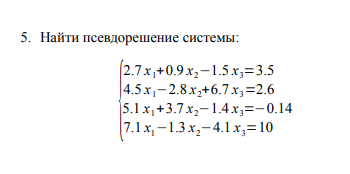

In [8]:

A = np.array([[2.7, 0.9, -1.5],
              [4.5, -2.8, 6.7],
              [5.1, 3.7, -1.4],
              [7.1, -1.3, -4.1]])
B = np.array([3.5, 2.6, -0.14, 10])

# Находим псевдорешение x с использованием метода наименьших квадратов
x_pseudo = np.linalg.lstsq(A, B, rcond=None)[0]

print("Псевдорешение x:")
print(x_pseudo)

Псевдорешение x:
[ 0.80406045 -1.3022679  -0.70499247]
